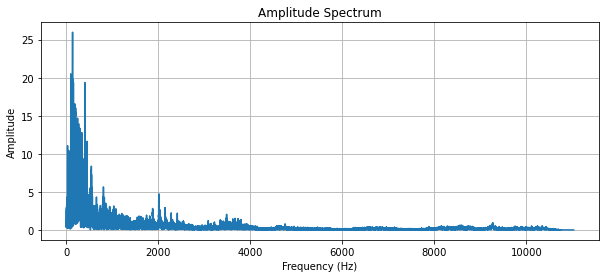

In [2]:
#A1
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the audio file
audio_file = "recording.wav"
y, sr = librosa.load(audio_file)

Y = np.fft.fft(y)

plt.figure(figsize=(10, 4))
freqs = np.fft.fftfreq(len(Y), 1/sr)
plt.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(freqs)//2])
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

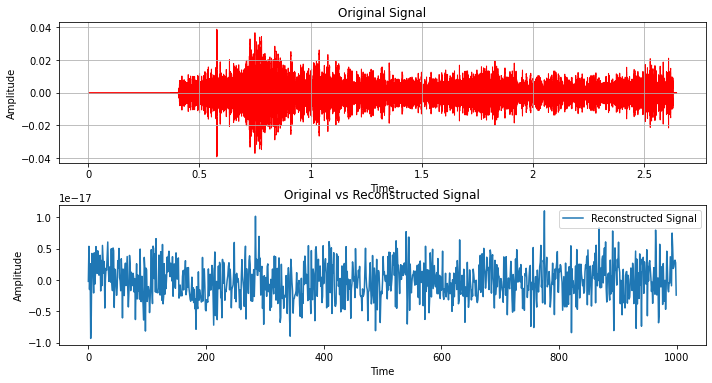

In [3]:
y_inv = np.fft.ifft(Y)
y_librosa, sr_librosa = librosa.load(audio_file)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr,color='red')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

print(" ")

plt.subplot(2, 1, 2)
plt.plot(np.real(y_inv[:1000]), label='Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original vs Reconstructed Signal')
plt.legend()
plt.show()

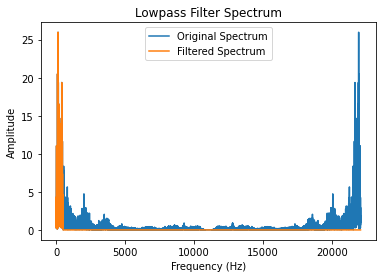

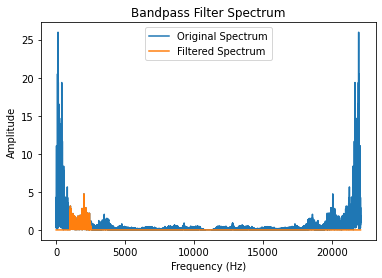

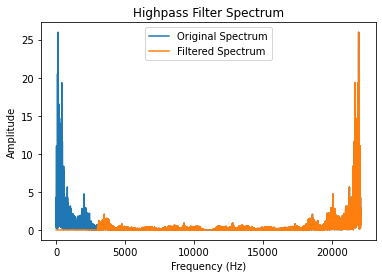

In [4]:
#A2
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

speech, sr = librosa.load("recording.wav")

fft_data = np.fft.fft(speech)
signal_length = len(fft_data)

def filter_and_play_plot(filter_type, cutoff_freqs=None):
  window = np.ones(signal_length)
  if filter_type == "lowpass":
    window[int(cutoff_freqs[0] * signal_length / sr):] = 0 
  elif filter_type == "highpass":
    window[:int(cutoff_freqs[0] * signal_length / sr)] = 0 
  elif filter_type == "bandpass":
    window[:int(cutoff_freqs[0] * signal_length / sr)] = 0
    window[int(cutoff_freqs[1] * signal_length / sr):] = 0
  else:
    print(f"Invalid filter type: {filter_type}")
    return None

  filtered_fft = fft_data * window

  freqs = np.arange(0, sr, sr / signal_length)
  plt.plot(freqs, np.abs(fft_data), label="Original Spectrum")
  plt.plot(freqs, np.abs(filtered_fft), label="Filtered Spectrum")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Amplitude")
  plt.title(f"{filter_type.capitalize()} Filter Spectrum")
  plt.legend()
  plt.show()

  filtered_speech = np.real(np.fft.ifft(filtered_fft))

  display(Audio(data=filtered_speech, rate=sr))

  return filtered_speech


filtered_low = filter_and_play_plot("lowpass", cutoff_freqs=(500,))

filtered_bandpass = filter_and_play_plot("bandpass", cutoff_freqs=(1000, 2500))

filtered_high = filter_and_play_plot("highpass", cutoff_freqs=(3000,))

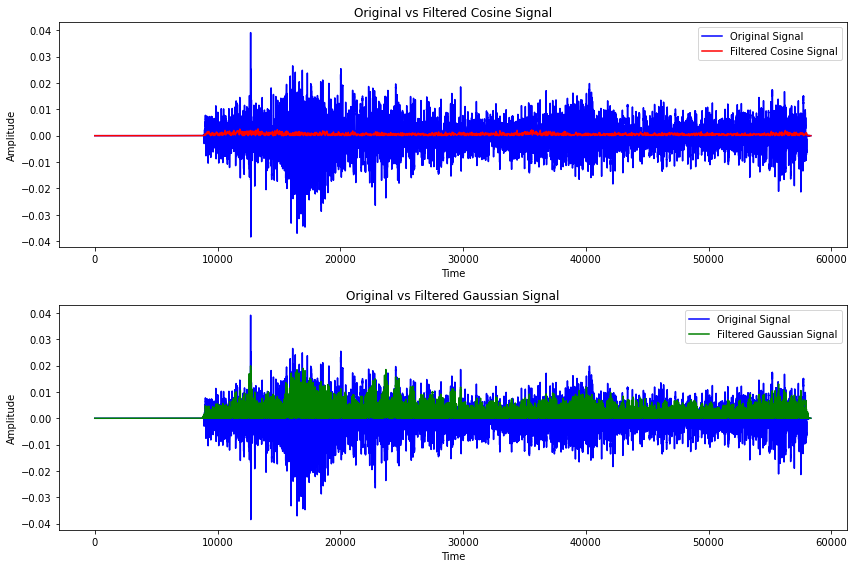

In [7]:
#A3
import numpy as np
import librosa
import matplotlib.pyplot as plt


y, sr = librosa.load('recording.wav')


Y = np.fft.fft(y)


freq_axis = np.fft.fftfreq(len(Y), 1/sr)


def cosine_filter(freqs, center_freq, bandwidth):
    return np.exp(-0.5 * ((freqs - center_freq) / bandwidth) ** 2)

def gaussian_filter(freqs, center_freq, std_dev):
    return np.cos(np.pi * (freqs - center_freq) / (2 * std_dev)) ** 2

center_freq = 1000 
bandwidth = 200
std_dev = 100

cosine_mask = cosine_filter(freq_axis, center_freq, bandwidth)
gaussian_mask = gaussian_filter(freq_axis, center_freq, std_dev)

filtered_cosine = Y * cosine_mask
filtered_gaussian = Y * gaussian_mask

y_cosine = np.fft.ifft(filtered_cosine)
y_gaussian = np.fft.ifft(filtered_gaussian)


plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(y, label='Original Signal', color='b')
plt.plot(np.abs(y_cosine), label='Filtered Cosine Signal', color='r')
plt.title('Original vs Filtered Cosine Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(y, label='Original Signal', color='b')
plt.plot(np.abs(y_gaussian), label='Filtered Gaussian Signal', color='g')
plt.title('Original vs Filtered Gaussian Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()